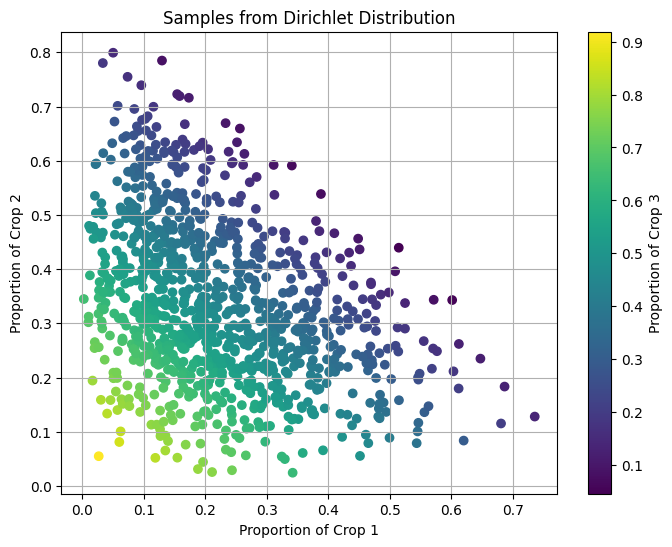

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the Dirichlet distribution
alpha = [2, 3, 4]  # Concentration parameters

# Number of samples
num_samples = 1000

# Generate samples from the Dirichlet distribution
samples = np.random.dirichlet(alpha, num_samples)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], c=samples[:, 2], cmap='viridis')
plt.xlabel('Proportion of Crop 1')
plt.ylabel('Proportion of Crop 2')
plt.title('Samples from Dirichlet Distribution')
plt.colorbar(label='Proportion of Crop 3')
plt.grid(True)
plt.show()


In [2]:
from scipy.optimize import minimize
from scipy.special import gammaln

# Observed data
data = samples

# Log-likelihood function for Dirichlet distribution
def log_likelihood(alpha, data):
    n, k = data.shape
    log_likelihood_val = 0
    
    for i in range(n):
        log_likelihood_val += np.sum((alpha - 1) * np.log(data[i]))
        log_likelihood_val += gammaln(np.sum(alpha)) - np.sum(gammaln(alpha))
    
    return -log_likelihood_val  # Negative because we want to minimize

# Initial guess for alpha
alpha_init = np.ones(data.shape[1])

# Minimize negative log-likelihood
result = minimize(log_likelihood, alpha_init, args=(data,), method='Nelder-Mead')

# Fitted Dirichlet distribution parameters
fitted_alpha = result.x
print("Fitted alpha:", fitted_alpha)


Fitted alpha: [1.96930897 2.97755433 3.93644126]


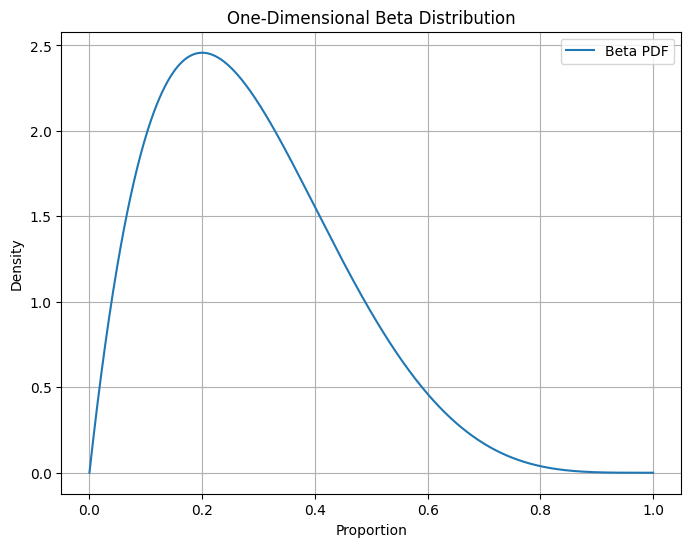

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
alpha, beta_param = 2, 5  # Parameters for the beta distribution

# Generate a range of values for the proportion (x-axis)
proportion_values = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) of the beta distribution
pdf_values = beta.pdf(proportion_values, alpha, beta_param)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(proportion_values, pdf_values, label='Beta PDF')
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.title('One-Dimensional Beta Distribution')
plt.legend()
plt.grid(True)
plt.show()


Direchlet is defined on Simplex, so it is for the direction of multi-objectives

Want to find a parameterized continuous distribution which support is $[0, 1]^d$ to represent Pareto